# Project: Investigate a Medical appointments No_Show Dataset to determine if patients will show up to their appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Data_exploration">Data Exploration</a></li>
<li><a href="#Data_wrangling">Data Wrangling</a></li>
<li><a href="#Data_visualization">Data Visualization</a></li>
<li><a href="#Data_analysis">Data Analysis</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset explores the number of patients who do or do not show up to their medical appointments, it lists these patients with a Yes value to those who do not show up to their appointments and No to those who do show up to their appointments.

> It also describes a variety of characterisitics of these patients, such as their Age, Neighourhood, medical conditions and their subscription to the social welfare program 'Bolsa Familia' under the Scholarship column.

>We will try to answer the following questions by exploring this dataset:
>1) Do scolarhips minimize the amount of no shows in this dataset?
>2) Do certain neighborhoods have a higher no show than others?

<a id='Data_exploration'></a>
## Data Exploration

In [20]:
#importing packages and building the initial DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Magic Keyword for inline plots
%matplotlib inline

#reading the dataset
no_show_df = pd.read_csv("noshowappointments-kagglev2-may-2016 (1).csv")
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
#Explore the shape and info of the dataset
print("Dataset's info\n")
no_show_df.info()
print("\nDataset's shape")
no_show_df.shape

Dataset's info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB

Dataset's shape


(110527, 14)

Dataset has 110527 rows and 14 columns

In [22]:
#Checking for duplicates
no_show_df.duplicated().sum()

0

In [23]:
#Checking for null values
no_show_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

>Seems that this dataset doesn't contain any duplicates or null values.
>We can see in the dataframe's head that the Neighborhood, AppointmentDay & Age fields contain duplicates, these are logical duplicate values however, so we will not be changing them.

<a id='Data_wrangling'></a>
## Data wrangling

We will start by removing the PatientId and AppointmentID as they have little significance in studying the dataset. They are important to determine a given patient's potential No_Show, but we are studying the dataset to learn about factors that impact a patient's No_Show.
> We will store the PatientId and AppointmentId along with their no_show stauts in a different dataframe to be merged if we wish to later

In [24]:
#We will use the copy method to create a new dataframe contianing only PatientId, AppointmentId & No_Show from the no_show_df
no_show_ids_df = no_show_df[['PatientId', 'AppointmentID', 'No-show']].copy()

#Renaming PatientId to PatientID for conformity's sake
no_show_ids_df.rename(columns= {'PatientId' : 'PatientID'}, inplace=True)

In [25]:
#Dropping PatienId and AppointmentID from the original dataframe
no_show_df = no_show_df.drop(labels=['PatientId', 'AppointmentID'], axis=1)

In [26]:
#Checking the dataframe
no_show_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [27]:
#Convert AppointmentDay and ScheduledDay from string to Datetime object
no_show_df['AppointmentDay'] = pd.to_datetime(no_show_df['AppointmentDay'])
no_show_df['ScheduledDay'] = pd.to_datetime(no_show_df['ScheduledDay'])
no_show_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
#We will also be converting the No_show column to 1 and 0 to represent Yes and No respectively
#First we rename the No-show to No_Show
no_show_df.rename(columns={'No-show':'No_show'}, inplace=True)
#Then we convert
no_show_df = no_show_df.replace(to_replace=['Yes', 'No'], value=[1, 0])
no_show_df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


#### Checking for any outliers in the dataset

In [29]:
no_show_df.describe(percentiles=[0.25, 0.50, 0.75, 0.95])

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
95%,75.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


> We can see that there are a few issues here, for instance the min Age seems to be negative and the Handcap contains elements above the allowed 0 or 1 indicating False or True. We will have to update these values to correct any negative age with its absolute value and round down any Handcap value above 1 down to 1

In [30]:
#First we will set up two conditions to look for the values we want to change in the dataframe
age_condition = no_show_df['Age'] < 0
handcap_condition = no_show_df['Handcap'] > 1

#We will then update the dataframe using loc to index any value that matches our condition in a given column:
no_show_df.loc[age_condition, 'Age'] = abs(no_show_df['Age'])
no_show_df.loc[handcap_condition, 'Handcap'] = 1

no_show_df.describe(percentiles=[0.25, 0.50, 0.75, 0.95]) 

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088892,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026,0.201933
std,23.110176,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873,0.401444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
95%,75.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='Data_visualization'></a>
## Data Visualization

array([[<AxesSubplot:title={'center':'ScheduledDay'}>,
        <AxesSubplot:title={'center':'AppointmentDay'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>],
       [<AxesSubplot:title={'center':'No_show'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

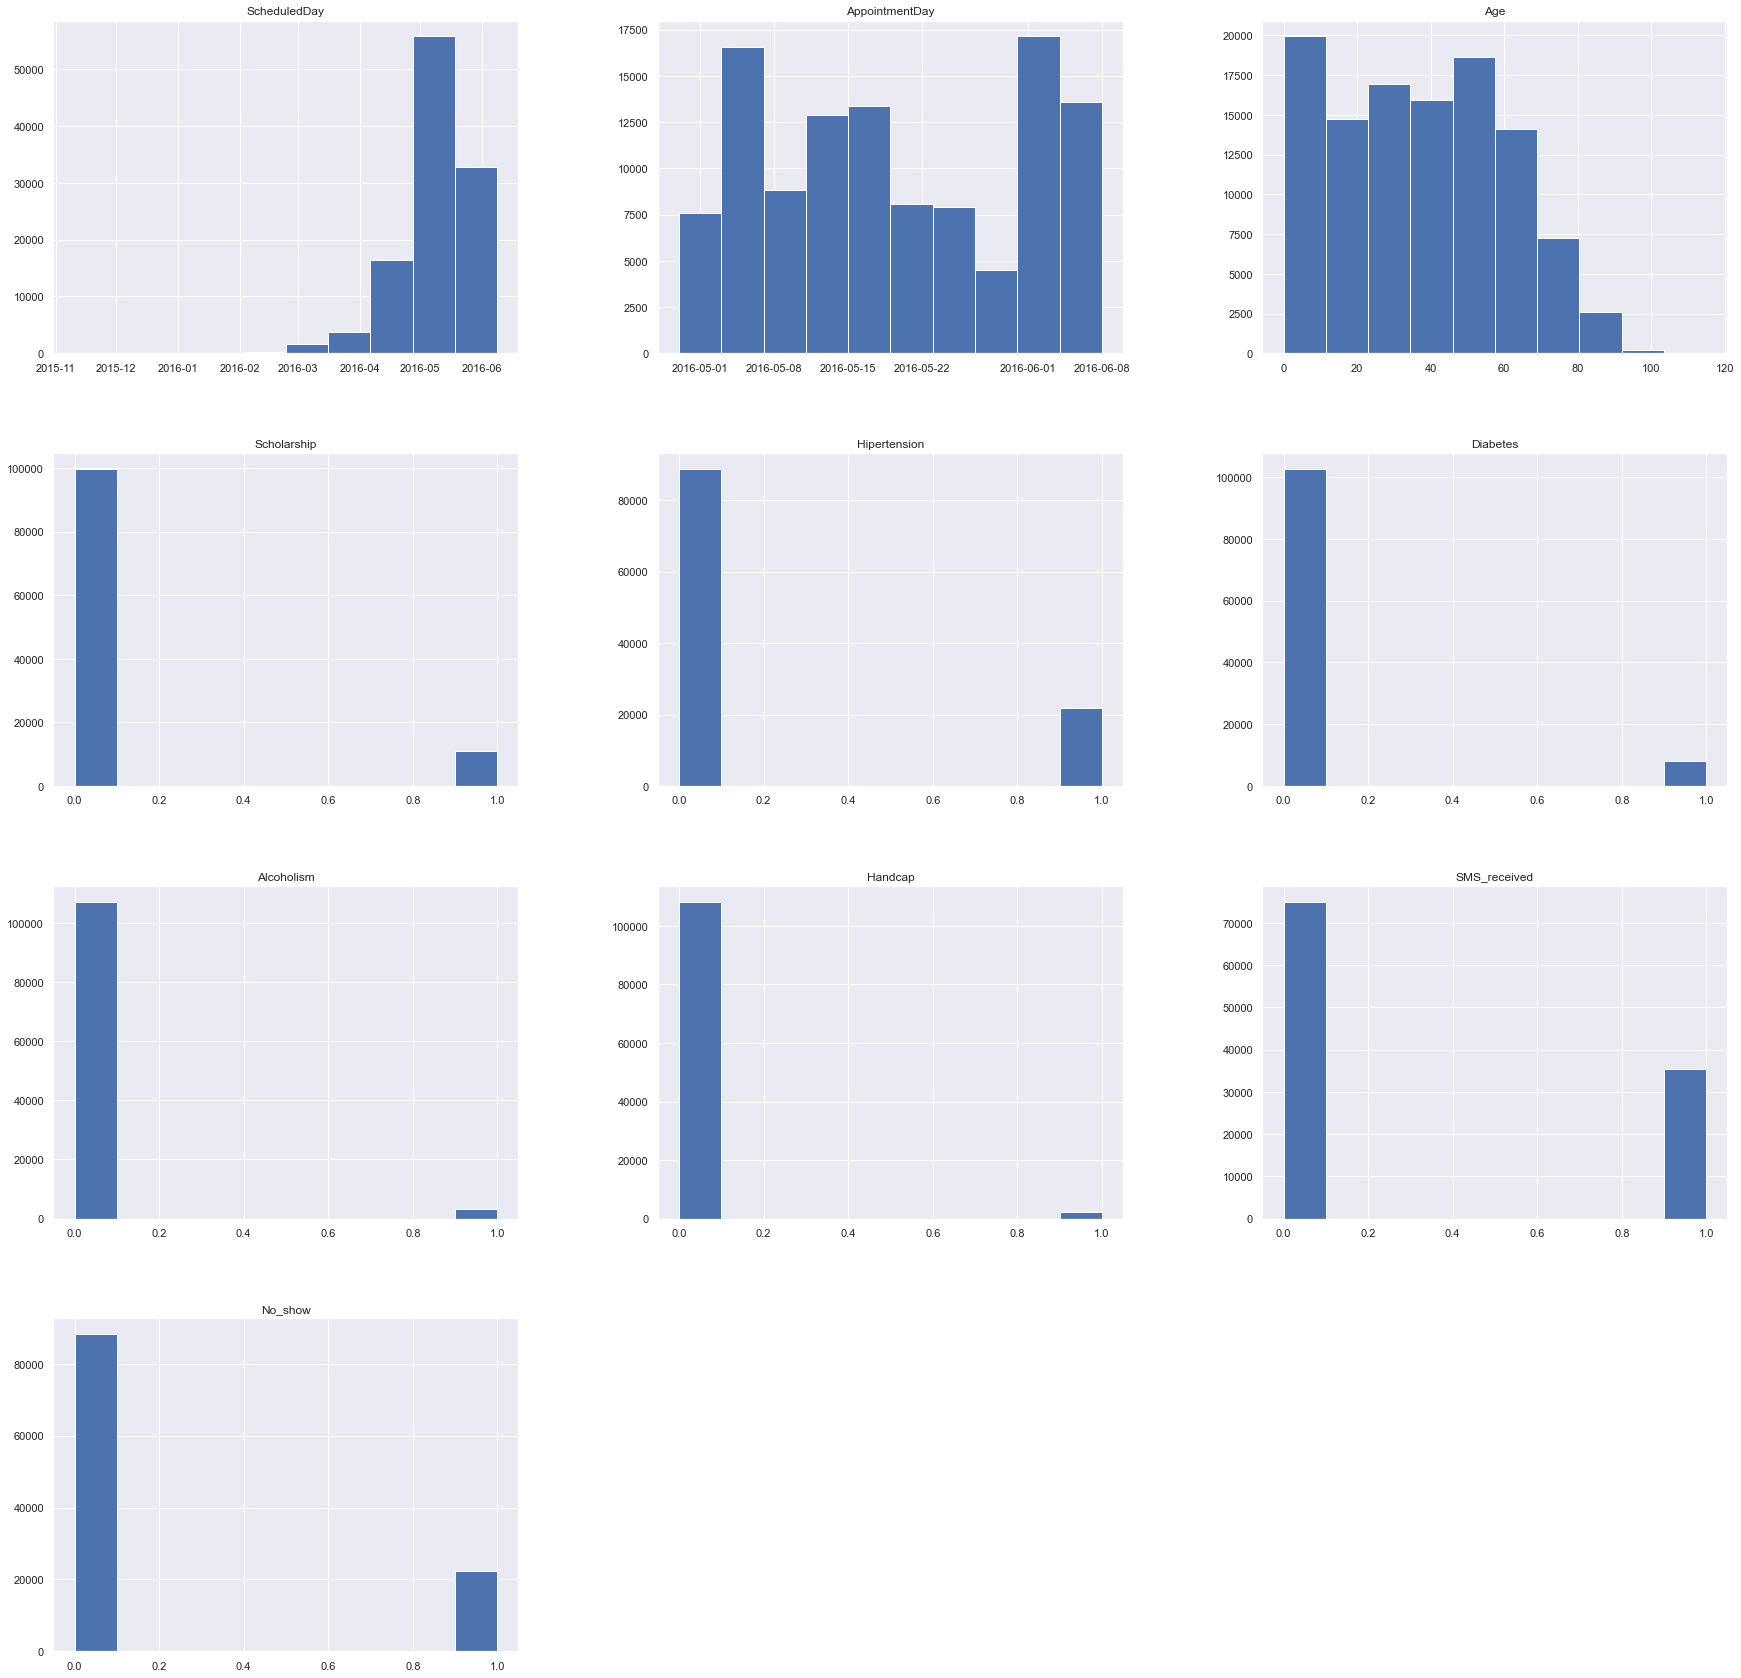

In [31]:
#First we visulaize the entire dataset
no_show_df.hist(figsize=(30,30))

<AxesSubplot:>

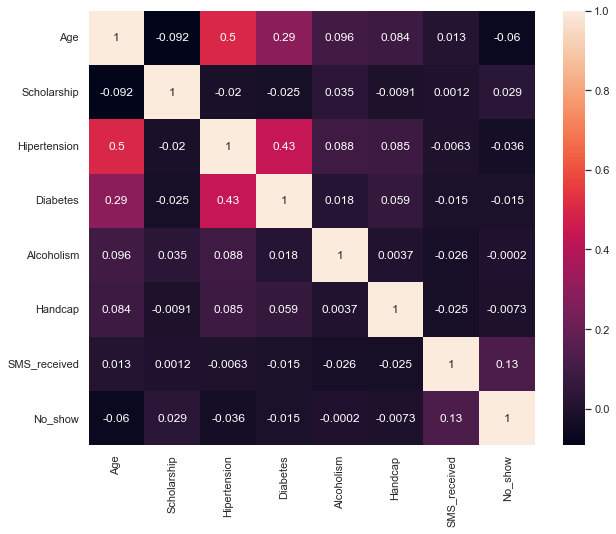

In [32]:
#Visualization using a heatmap
#we set the correlation matrix
correlation_matrix = no_show_df.corr()
#we update the figsize
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(correlation_matrix, annot=True)

F    71840
M    38687
Name: Gender, dtype: int64


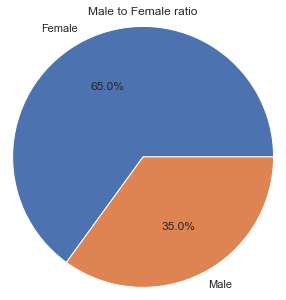

In [38]:
#Plotting the distribution of Males and Females in the dataset
#We will first get the value_counts of each gender for labling purposes
print(no_show_df['Gender'].value_counts())
#We will create a function to plot pie charts with their appropriate labels
def pie_plot(column, title, label1, label2):
    #we set up the figure size for all pie charts we will plot with this function
    plt.figure(figsize=[5,5])
    #We set up the title for the plots
    plt.title(title)
    #we plot the column alongside the labels 1 and 2
    plt.pie(column.value_counts(), labels=[label1, label2], autopct='%.1f%%', radius=1.2)
    #we display the plot
    plt.show()

#We will use the function we defined above to plot the pie chart of males and females in this dataset
pie_plot(no_show_df['Gender'], 'Male to Female ratio', 'Female', 'Male')

<a id='Data_analysis'></a>
## Data Analysis

### Answering quetions number 1: Are patients with scholarships more likely to show up to their appointments, or do scholarships have no effect on whether patients show up or not?

We can start by plotting a graph illustrating the connection between no-show and Scholarships. We will use piecharts to plot the percentages of positive/negative no-shows and positive/negative Scholarships

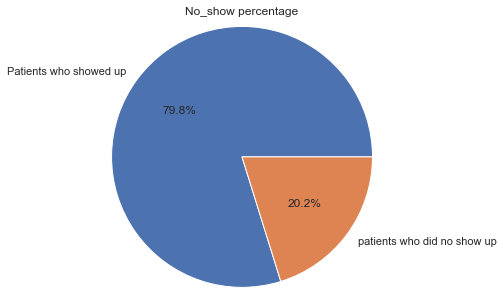

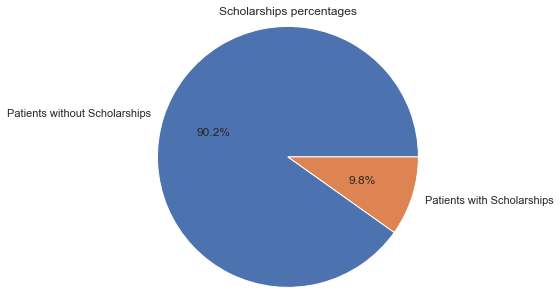

In [39]:
#We will call the pie_plot function to plot the pie charts we need for this connection
pie_plot(no_show_df['No_show'],'No_show percentage', 'Patients who showed up', 'patients who did no show up') #Plotting the No_show pie chart
pie_plot(no_show_df['Scholarship'],'Scholarships percentages' , 'Patients without Scholarships', 'Patients with Scholarships') #Plotting the Scholarship pie_chart

> It seems that there isn't a substantial connection between patients with Scholarships and patients who show up. Using the info we get from the Pie Chart above we can see that the majority of patients in this dataset don't have a scholarship (90%), and yet 79.8% still show up to their appointments

### Answering question number 2: Are there neighborhoods with a substantial number of patients who do not show up to their appointments than others?

<AxesSubplot:title={'center':'Nighbourhoods with the highest no_show'}, xlabel='Neighbourhoods', ylabel='Number of No_shows'>

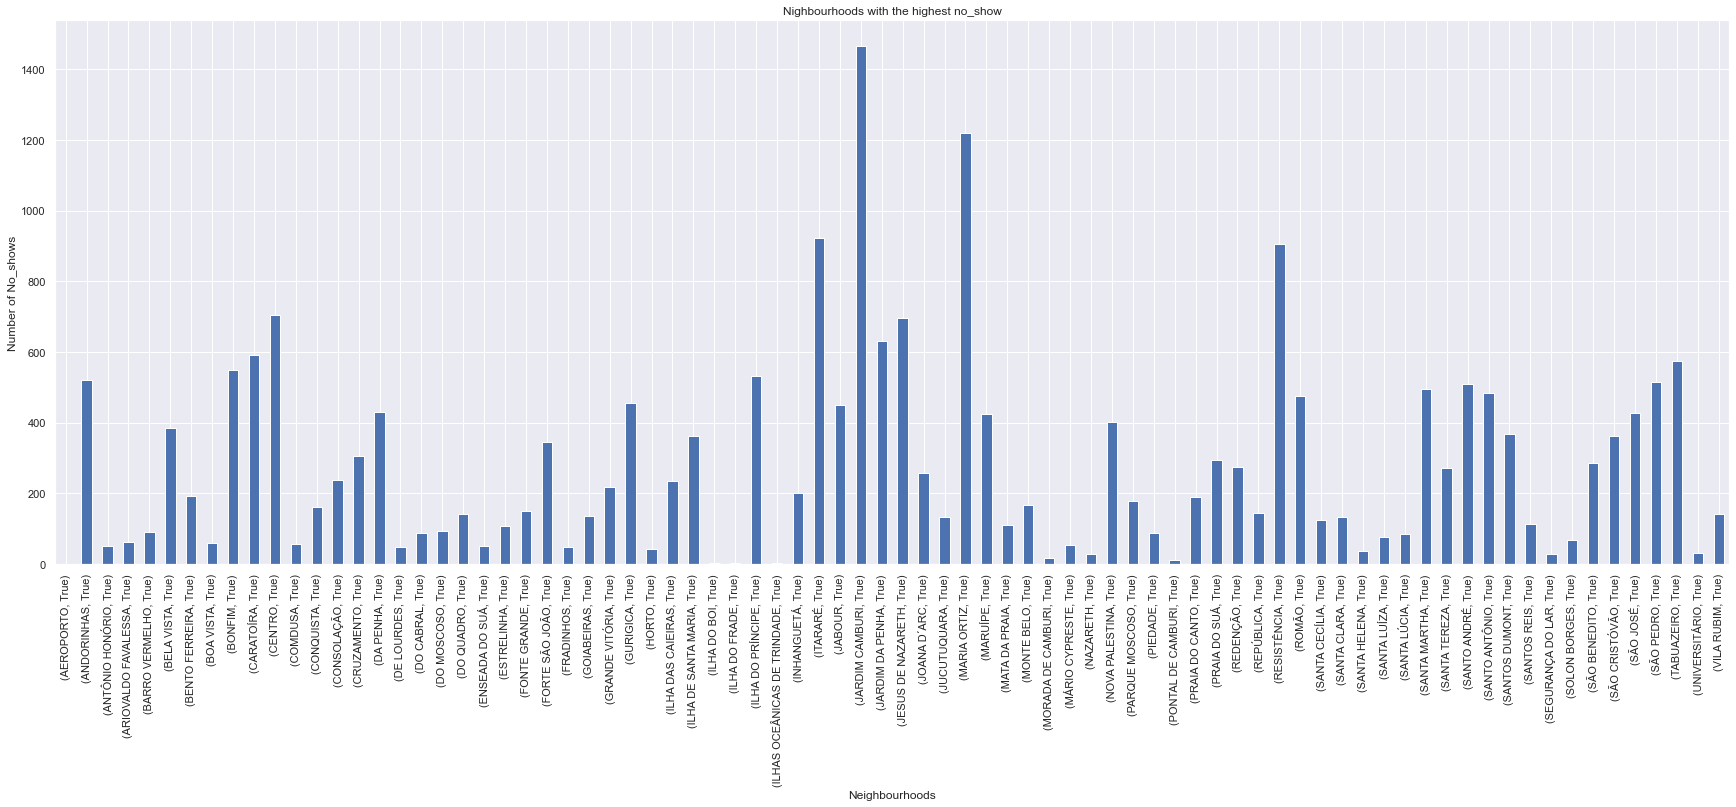

In [35]:
#We will create a smaller dataframe containing only the columns we need, this dataframe will contain neighbourhoods with patients who have a positive no_show
no_show_neighbourhoods = no_show_df[['Neighbourhood', 'No_show']].copy()
no_show_positive = no_show_neighbourhoods['No_show'] == 1
#We don't need the No_show column, so we will update it with the column no_show_positive listing if a nighrborhood has a no_show or not
no_show_neighbourhoods['No_show'] = no_show_positive
#We're also dropping rows where neighbourhoods have a negative no_show
no_show_neighbourhoods.drop(no_show_neighbourhoods[no_show_neighbourhoods['No_show'] == False].index, inplace=True)

#Now that we have a dataframew with only neighbourhoods that have a positive No_show, we can plot it to see which neighbourhoods have a higher no_show than others
no_show_neighbourhoods.groupby(['Neighbourhood']).value_counts().plot(kind = "bar", figsize=(30,10), title='Nighbourhoods with the highest no_show', xlabel='Neighbourhoods', ylabel='Number of No_shows')

#### It appears that the top 4 neighbourhoods with a substantial number of no shows than the others are the following:

> 1- Jardim Camburi  
> 2- Maria Ortiz  
> 3- Itararé  
> 4- Resisténcia  

<a id='Conclusion'></a>
## Conclusion

> From the exploration and analysis we performed above, we can Answer the questions we posed in the beggining of this report.
We know that, despite a false perception of contribution, Scholarships do not contribute to determining if a patient will show up to their appointment. The dataset shows that there are a large number of patients without scholarships and yet a bigger percentage of patients still show up to their appointments.

> We have also narrowed down the top neighbourhoods that have a higher chance of patients not showing up to their appointments, and these neighbourhoods are the following:  
1- Jardim Camburi  
2- Maria Ortiz  
3- Itararé  
4- Resisténcia

> We can use this information to determine if a certain patient will show up to their appointment or not, in conjunction with exploring other features for a higher predicition rate.

#### Dataset Limitations

>One of the dataset's limitation is the inability to build a connection based on a patient's distance from their appointment location, which could be a major factor in determining if a patient will show up or not, this is due to a one missing attribute: appointment location. We could also have been able to build a new attribute if "appointment location" existed by calculating the distance between the neighbourhood and the appointemnt location, but since this doesn't exist, it hinders the ability to complete an analysis on thie factor.

>Another limitation worth mentioning, is appointment cost, which we can track with the Scholarship status, this would give us the chance to also analyze if scholarships do help make appointments more manageable in a society and help track the patients who are not showing up because of a high appointment cost and a no scholarship to cover for them.